## Set up environment
The file `environment.yml` specifies the dependencies required to run the TRangle package. You can create a conda environment using this file:

```bash
conda env create -f environment.yml
```
In the main project directory run
```bash
pip install -e .
```


## Measure angles of existing TCR structures
To measure angles in existing TCR structures, you can use the `new_calc.py` script provided in the TRangle package. This script allows you to calculate angles and distances in a TCR structure file.


```bash
python trangle/calc_geometry.py --input_pdb path/to/your/input.pdb
```
This will output a CSV file with the measured angles and distances.
It will also output a PDB of the extracted variable domain, was well as a visualiseation of the measured angles and distance saved as an image and a .pse file which can be opened in PyMOL.


## Measure angles of existing TCR trajectories
To measure angles in existing TCR trajectories, you can use the `new_calc_MD.py` script provided in the TRangle package. This script allows you to calculate angles and distances in a TCR trajectory file.

```bash
python trangle/calc_geometry_MD.py --input_pdb path/to/your/input.pdb --input_md path/to/your/input.traj
```

## Change geometry of a TCR structure

To change the geometry of a TCR structure, you can use the `change_geometry.py` script provided in the TRangle package. This script allows you to modify angles and distances in a TCR structure based on a configuration file.

```bash
python trangle/change_geometry.py --input_pdb path/to/your/input.pdb --BA 113.22 --BC1 98.75 --BC2 9.35 --AC1 71.58 --AC2 154.62 --dc 23.98
```
This script will read the configuration file, apply the specified changes to the angles and distances, and output a new PDB file with the modified geometry. It will also generate a visualization of the modified structure for inspection.


## Extract loop anchor residue coordinates
To extract the coordinates of loop anchor residues from a TCR structure, you can use the `extract_loop_anchor.py` script provided in the TRangle package. This script allows you to specify the loop anchor residues and extract their coordinates from a TCR structure file.

```bash
python trangle/get_anchor_coords.py path/to/your/input.pdb 
```
This will output a dictionary containing the coordinates of the specified loop anchor residues, which can be used for input to the CDR loop diffusion model.

# Example Usage of TRangle



### Measure angles of existing TCR structures

In [3]:
%cd ../
!pip install -e .
%cd examples
import os
current_folder = os.getcwd()

/workspaces/Graphormer/TRangle
Obtaining file:///workspaces/Graphormer/TRangle
  Preparing metadata (setup.py) ... done
  Attempting uninstall: trangle
    Found existing installation: trangle 0.1.0
    Uninstalling trangle-0.1.0:
      Successfully uninstalled trangle-0.1.0
  DEPRECATION: Legacy editable install of trangle==0.1.0 from file:///workspaces/Graphormer/TRangle (setup.py develop) is deprecated. pip 25.3 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457
  Running setup.py develop for trangle
/workspaces/Graphormer/TRangle/examples


In [19]:
import sys
import os
from pathlib import Path
import trangle
from trangle.calc_geometry import run
input_pdb=os.path.join(current_folder,"test","A6prmtop_first_frame_GT.pdb")
output_path=os.path.join(current_folder,"outputs")
Path(output_path).mkdir(parents=True, exist_ok=True)

result_angles=run(input_pdb, os.path.join(output_path,"calc_test_A6"), vis=True)
result_angles

Removing 84 non-variable residues from Chain A
Removing 129 non-variable residues from Chain B
💾 Saved aligned structure to '/workspaces/Graphormer/TRangle/examples/outputs/calc_test_A6/A6prmtop_first_frame_GT/aligned_input.pdb'
💾 Saved aligned structure to '/workspaces/Graphormer/TRangle/examples/outputs/calc_test_A6/A6prmtop_first_frame_GT/aligned_consB.pdb'
 Setting-Warning: 'label_size' is a object-state-level setting
 Setting-Warning: 'label_outline_color' is a object-state-level setting
✅ PyMOL script written: /workspaces/Graphormer/TRangle/examples/outputs/calc_test_A6/A6prmtop_first_frame_GT/vis/vis.py
 Setting-Warning: 'label_size' is a object-state-level setting
 Setting-Warning: 'label_outline_color' is a object-state-level setting
📄 Saved: /workspaces/Graphormer/TRangle/examples/outputs/calc_test_A6/A6prmtop_first_frame_GT/angles_results.csv
🖼️  Figures/PSE in: /workspaces/Graphormer/TRangle/examples/outputs/calc_test_A6/A6prmtop_first_frame_GT/vis


,pdb_name,BA,BC1,AC1,BC2,AC2,dc
0,A6prmtop_first_frame_GT_imgt_fv,-69.619049,100.20687,108.397479,161.993065,151.473852,25.682481


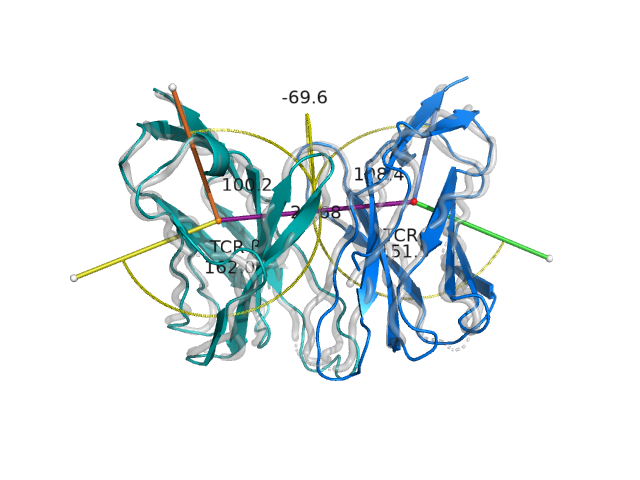

In [9]:
#display png
from IPython.display import Image
from IPython.display import display
image_path = Path(os.path.join(output_path,"calc_test_A6","A6prmtop_first_frame_GT","vis","A6prmtop_first_frame_GT_imgt_fv_aligned_input_final_vis.png"))
if image_path.exists():
    display(Image(filename=image_path))

### Measure angles and distance of TCR trajectories

In [ ]:
#Measure angles and distance of TCR trajectories
from trangle.calc_geometry_MD import run as run_MD
pdb_file="A6prmtop_first_frame.pdb" #replace with you own file
md_file="Prod_Concat_A6_CMD.xtc" #replace with you own file
out_dir="output_MD"
run_MD(
        input_pdb=pdb_file,
        input_md=md_file,
        out_path=out_dir,
        vis=False
    )


### Generate TCRs with specified geometry

In [17]:
from trangle.change_geometry import run as change_geometry_run
input_pdb=os.path.join(current_folder,"test","A6prmtop_first_frame_GT.pdb")
output_path=os.path.join(current_folder,"outputs")
BA = -60.619049
BC1 = 100.20687
BC2 = 161.993065
AC1 = 108.397479
AC2 = 151.473852
dc = 25.682481
change_geometry_run(input_pdb,os.path.join(output_path,"change_test_A6"), BA, BC1, BC2, AC1, AC2, dc)

Removing 84 non-variable residues from Chain A
Removing 129 non-variable residues from Chain B
Saved new target geometry with pseudoatoms to: /workspaces/Graphormer/TRangle/examples/outputs/change_test_A6/A6prmtop_first_frame_GT/consensus_oriented.pdb
Saved final aligned structure to: /workspaces/Graphormer/TRangle/examples/outputs/change_test_A6/A6prmtop_first_frame_GT/A6prmtop_first_frame_GT_oriented.pdb

✅ PyMOL script saved. Run with:
   pymol -cq /workspaces/Graphormer/TRangle/examples/outputs/change_test_A6/A6prmtop_first_frame_GT/vis/A6prmtop_first_frame_GT_final_vis.py
Output files saved in: /workspaces/Graphormer/TRangle/examples/outputs/change_test_A6/A6prmtop_first_frame_GT


In [20]:
#Validate this new geometry by re-calculating the angles
input_pdb=os.path.join(output_path,"change_test_A6","A6prmtop_first_frame_GT","A6prmtop_first_frame_GT_oriented.pdb")
result_angles=run(input_pdb, os.path.join(output_path,"calc_test_A6_validate"), vis=True)
result_angles

💾 Saved aligned structure to '/workspaces/Graphormer/TRangle/examples/outputs/calc_test_A6_validate/A6prmtop_first_frame_GT_oriented/aligned_input.pdb'
💾 Saved aligned structure to '/workspaces/Graphormer/TRangle/examples/outputs/calc_test_A6_validate/A6prmtop_first_frame_GT_oriented/aligned_consB.pdb'
 Setting-Warning: 'label_size' is a object-state-level setting
 Setting-Warning: 'label_outline_color' is a object-state-level setting
✅ PyMOL script written: /workspaces/Graphormer/TRangle/examples/outputs/calc_test_A6_validate/A6prmtop_first_frame_GT_oriented/vis/vis.py
 Setting-Warning: 'label_size' is a object-state-level setting
 Setting-Warning: 'label_outline_color' is a object-state-level setting
📄 Saved: /workspaces/Graphormer/TRangle/examples/outputs/calc_test_A6_validate/A6prmtop_first_frame_GT_oriented/angles_results.csv
🖼️  Figures/PSE in: /workspaces/Graphormer/TRangle/examples/outputs/calc_test_A6_validate/A6prmtop_first_frame_GT_oriented/vis


,pdb_name,BA,BC1,AC1,BC2,AC2,dc
0,A6prmtop_first_frame_GT_oriented_imgt_fv,-60.619693,100.206462,108.398055,161.994651,151.473262,25.68251


### Extract anchor point coordinates from TCR structure

In [22]:
from trangle.get_anchor_coords import run as extract_anchor_points_run

anchor_coords=extract_anchor_points_run(input_pdb)
print(anchor_coords)

{'A': {'CDR1': {'start': [22.348, 0.447, 9.174], 'end': [15.616, -5.651, -12.791]}, 'CDR2': {'start': [36.376, -2.783, 11.051], 'end': [29.564, -1.827, 16.471]}, 'CDR3': {'start': [16.989, -1.203, 0.488], 'end': None}}, 'B': {'CDR1': {'start': [-0.957, -7.598, -4.567], 'end': [12.912, 7.052, 6.992]}, 'CDR2': {'start': [-2.391, -11.076, 10.111], 'end': [-4.66, -5.483, 5.513]}, 'CDR3': {'start': [12.619, -11.218, 1.773], 'end': None}}}
